<a href="https://colab.research.google.com/github/DimathJayasinghe/ModelX_hackathon/blob/main/git_push_force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Data Preprocessing & Understanding



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Dementia Prediction Dataset.csv',low_memory=False)

In [4]:
df

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195191,NACC998475,9661,F,2.0,11,6,2008,3,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
195192,NACC999391,9661,I,1.0,3,2,2006,1,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
195193,NACC999391,9661,F,1.0,5,17,2007,2,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
195194,NACC999391,9661,F,2.0,3,27,2008,3,3,3,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [5]:
## selected these non medical features by reading data dictionary
non_medical_variables = [
    "MARISTAT", "NACCLIVS", "INDEPEND", "RESIDENC", "HANDED", "BIRTHMO", "BIRTHYR", "SEX",
    "HISPANIC", "HISPOR", "HISPORX", "RACE", "RACEX",
    "RACESEC", "RACESECX", "RACETER", "RACETERX", 'NACCNIHR',
    "PRIMLANG", "PRIMLANX", "EDUC", "NACCREAS",
    "NACCREFR", "NACCNIHR",

    "INBIRMO", "INBIRYR", "INSEX", "NEWINF",

    "NACCFAM", "NACCMOM", "NACCDAD", "NACCFADM",
    "NACCAM", "NACCAMS"
]
df_new=df[non_medical_variables]

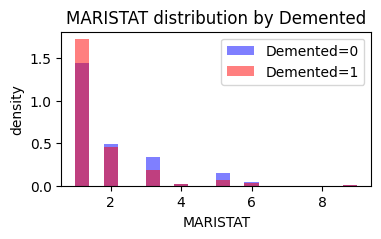

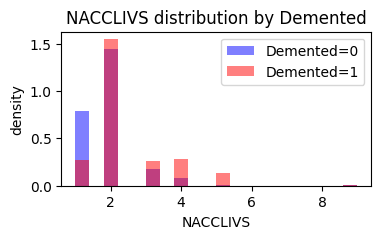

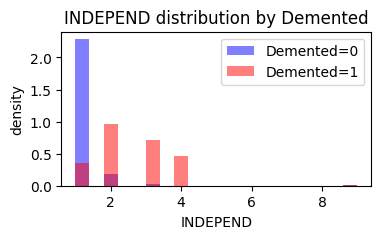

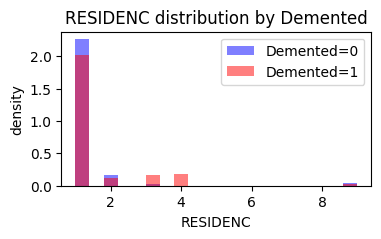

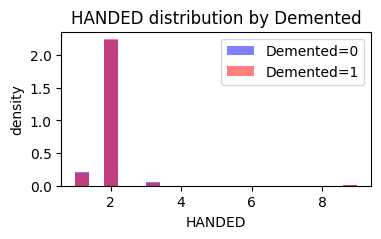

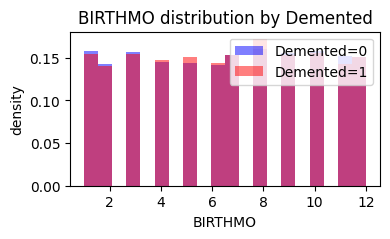

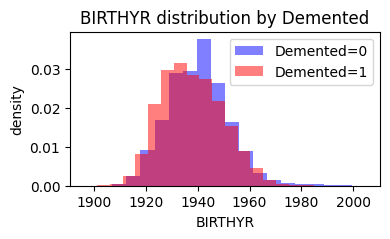

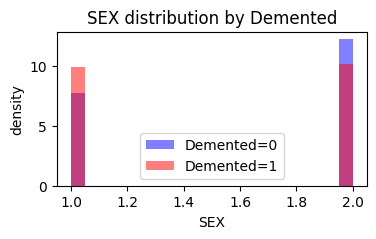

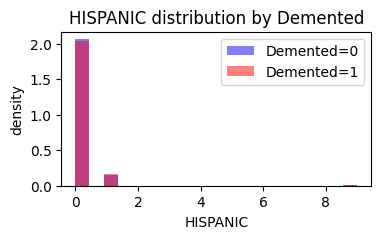

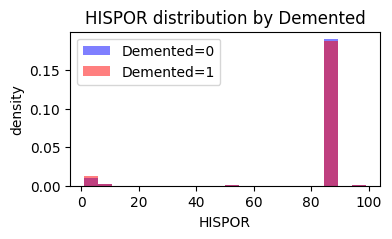

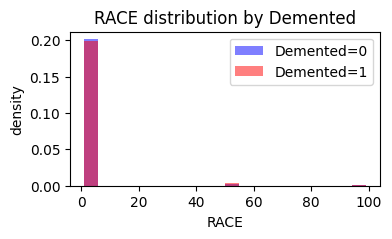

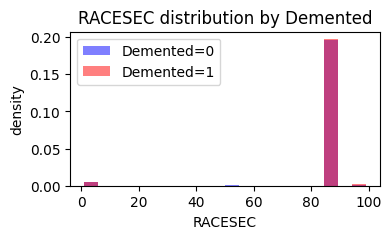

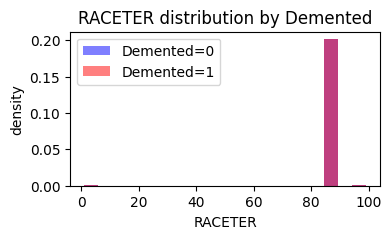

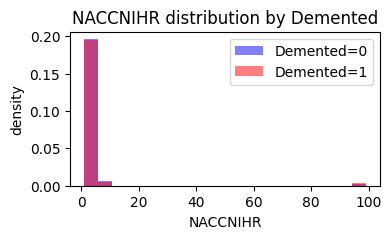

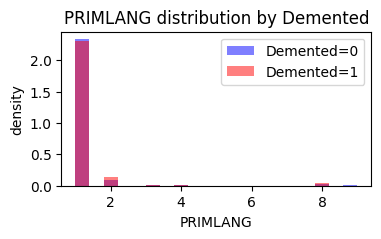

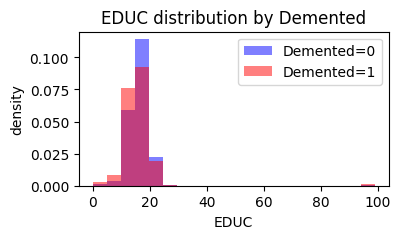

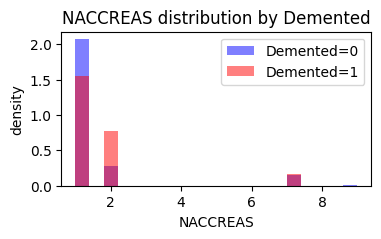

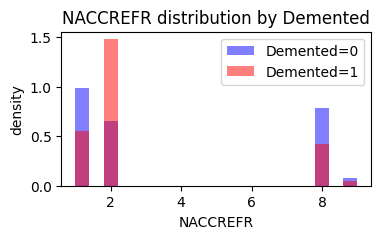

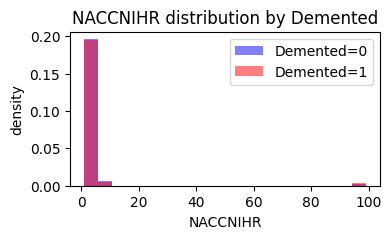

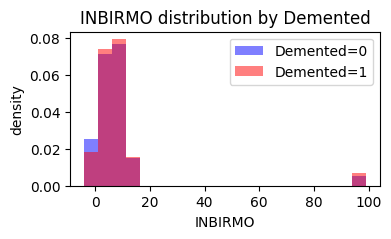

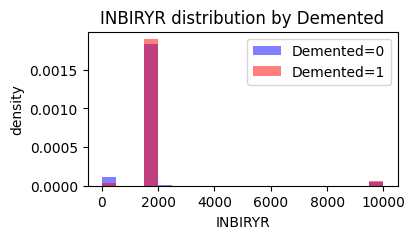

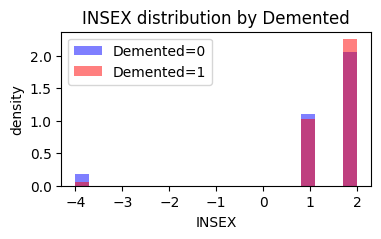

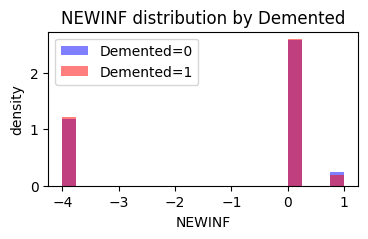

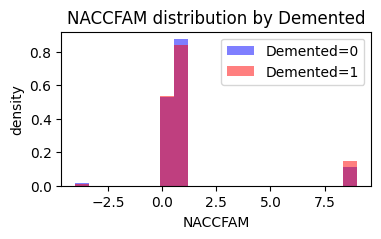

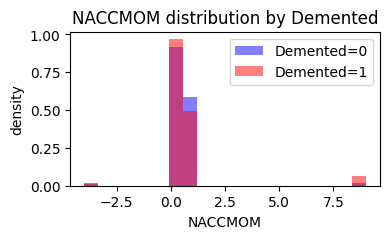

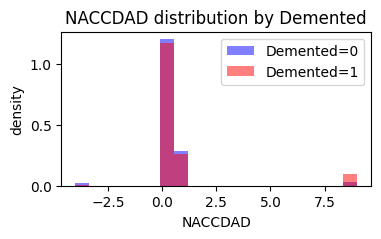

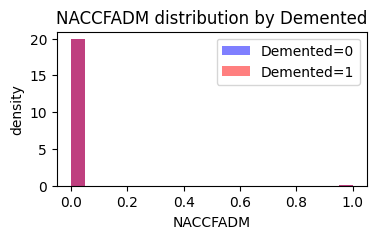

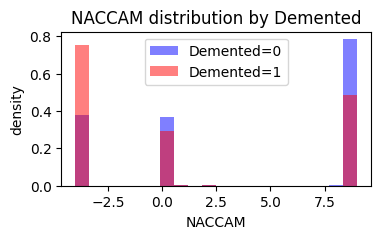

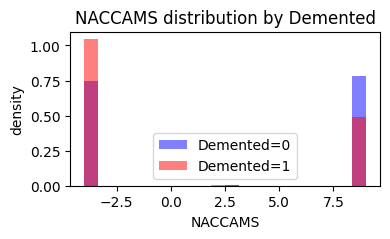

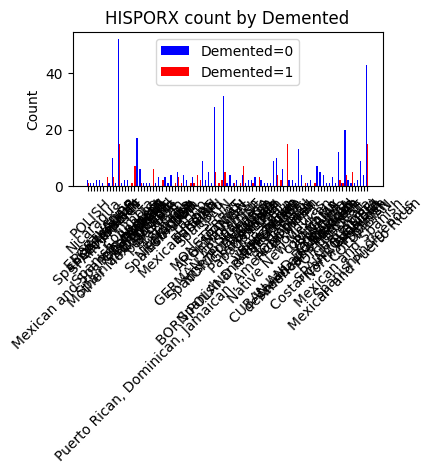

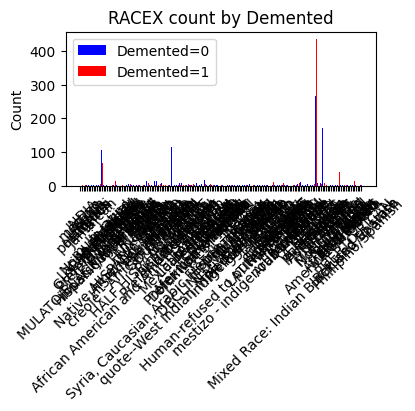

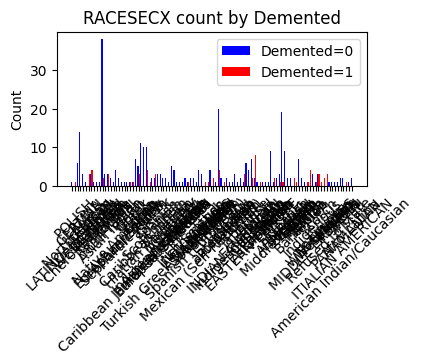

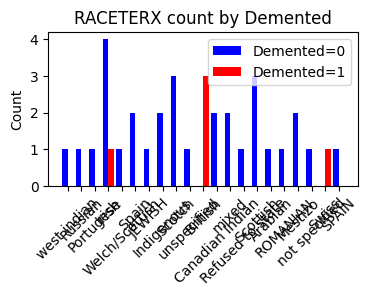

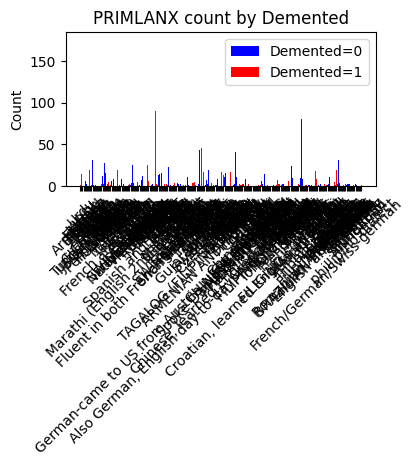

In [6]:

# Separate numeric and categorical columns
numeric_cols = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_new.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    plt.hist(df[df['DEMENTED']==0][col], bins=20, density=True, alpha=0.5, label='Demented=0', color='blue')
    plt.hist(df[df['DEMENTED']==1][col], bins=20, density=True, alpha=0.5, label='Demented=1', color='red')
    plt.title(f'{col} distribution by Demented')
    plt.xlabel(col)
    plt.ylabel('density')
    plt.legend()
    plt.show()

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(4,2))
    counts_0 = df[df['DEMENTED']==0][col].value_counts()
    counts_1 = df[df['DEMENTED']==1][col].value_counts()

    # Combine index for alignment
    categories = list(set(counts_0.index) | set(counts_1.index))
    counts_0 = counts_0.reindex(categories, fill_value=0)
    counts_1 = counts_1.reindex(categories, fill_value=0)

    # Bar width
    width = 0.4
    x = range(len(categories))

    plt.bar([i - width/2 for i in x], counts_0, width=width, color='blue', label='Demented=0')
    plt.bar([i + width/2 for i in x], counts_1, width=width, color='red', label='Demented=1')
    plt.xticks(x, categories, rotation=45)
    plt.title(f'{col} count by Demented')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [7]:
df_new.isnull().sum()

,0
MARISTAT,0
NACCLIVS,0
INDEPEND,0
RESIDENC,0
HANDED,0
BIRTHMO,0
BIRTHYR,0
SEX,0
HISPANIC,0
HISPOR,0


## 2. Feature Engineering & Selection

In [8]:
# after visualizaton we found most categorical variable dont effect to the model and
# there are lots of categories in those features and lots of them are null
# and also there are some variables that dont affect to the model performance
# so,
df_new=df_new.drop(['HANDED','RACE','RACESEC','RACETER','NACCNIHR','PRIMLANG','NACCNIHR','NACCFADM'],axis=1)
df_new = df_new.apply(pd.to_numeric, errors='coerce')
cols_with_missing = df_new.columns[df_new.isnull().sum() != 0].tolist()
df_new=df_new.drop(cols_with_missing,axis=1)
df_new.columns

Index(['MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'BIRTHMO', 'BIRTHYR',
       'SEX', 'HISPANIC', 'HISPOR', 'EDUC', 'NACCREAS', 'NACCREFR', 'INBIRMO',
       'INBIRYR', 'INSEX', 'NEWINF', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM',
       'NACCAMS'],
      dtype='object')

In [9]:
df['DEMENTED'].value_counts()

,count
DEMENTED,
0,137606
1,57590


In [10]:
from sklearn.model_selection import train_test_split

x = df_new
y = df['DEMENTED']

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)
# dataset is imbalanced
from imblearn.over_sampling import SMOTE
X_train,y_train=SMOTE(random_state=42).fit_resample(X_train,y_train)

In [11]:
# normalizing dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## 3. Model Development & Training

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8968237704918033
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     27530
           1       0.81      0.85      0.83     11510

    accuracy                           0.90     39040
   macro avg       0.87      0.88      0.88     39040
weighted avg       0.90      0.90      0.90     39040



In [13]:
confusion_matrix(y_test, y_pred)

array([[25236,  2294],
       [ 1734,  9776]])

In [14]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [15]:
y_proba

array([0.65441739, 0.16367759, 0.84853727, ..., 0.05461696, 0.13770621,
       0.77158606])

In [16]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8952356557377049
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     27530
           1       0.80      0.86      0.83     11510

    accuracy                           0.90     39040
   macro avg       0.87      0.88      0.88     39040
weighted avg       0.90      0.90      0.90     39040



In [17]:
confusion_matrix(y_test, y_pred)

array([[25071,  2459],
       [ 1631,  9879]])

In [18]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'n_estimators': 200,
    'num_leaves': 255,
    'max_depth': 12,
    'max_bin': 255,

    'lambda_l1': 0.1,
    'lambda_l2': 0.3,
    'min_gain_to_split': 0.0,
    'min_data_in_leaf': 30,


    'is_unbalance': False,

    'max_cat_threshold': 64,
    'cat_smooth': 10,
    'random_state': 42,

    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}
model = lgb.train(
    params,
    train_data,
    num_boost_round=300,
    valid_sets=[train_data, test_data]
)

# Predict
y_proba = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_proba > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9012551229508197
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     27530
           1       0.81      0.87      0.84     11510

    accuracy                           0.90     39040
   macro avg       0.88      0.89      0.88     39040
weighted avg       0.90      0.90      0.90     39040



In [19]:
confusion_matrix(y_test, y_pred)

array([[25166,  2364],
       [ 1491, 10019]])

## 4. Hyperparameter Tuning & Optimization

In [20]:
## we use following features to create a better model
non_medical_variables = [
    # Demographics
    "BIRTHMO", "BIRTHYR", "NACCAGE", "NACCAGEB", "SEX",
    "HISPANIC", "HISPOR", "HISPORX",
    "RACE", "RACEX", "RACESEC", "RACESECX", "RACETER", "RACETERX",
    "PRIMLANG", "PRIMLANX", "EDUC", "MARISTAT",
    "NACCLIVS", "INDEPEND", "RESIDENC", "HANDED",

    # Informant / study partner
    "INBIRMO", "INBIRYR", "INSEX", "NEWINF",
    "INHISP", "INHISPOR", "INHISPOX",
    "INRACE", "INRACEX", "INRASEC", "INRASECX",
    "INRATER", "INRATERX", "INEDUC",
    "INRELTO", "INRELTOX", "INKNOWN", "INLIVWTH",
    "INVISITS", "INCALLS", "INRELY",

    # Family / household
    "NACCFAM", "NACCMOM", "NACCDAD",
    "NACCAM", "NACCAMX", "NACCAMS", "NACCAMSX",
    "NACCFM", "NACCFMX", "NACCFMS", "NACCFMSX",
    "NACCOM", "NACCOMX", "NACCOMS", "NACCOMSX",
    "NACCFADM", "NACCFFTD",

    # Lifestyle / substance use
    "TOBAC30", "TOBAC100", "SMOKYRS", "PACKSPER", "QUITSMOK",
    "ALCOCCAS", "ALCFREQ", "ALCOHOL",

    # Basic physical / anthropometrics / vitals (non-clinical measurements)
    "HEIGHT", "WEIGHT", "NACCBMI", "BPSYS", "BPDIAS", "HRATE",
    "VISION", "VISCORR", "VISWCORR", "HEARING", "HEARAID", "HEARWAID",

    # Self-reported/simple medical history (things a person usually knows)
    "DIABETES", "HYPERTEN", "HYPERCHO", "MYOINF", "CVHATT",
    "CONGHRT", "AFIBRILL", "CVCHF", "CVANGINA", "CVANGIO",
    "CVBYPASS", "CVPACDEF", "CVPACE",
    "CBSTROKE", "STROKE", "PREVSTK", "CBTIA", "TBI", "NACCTBI",
    "PD", "SEIZURES",

    # Psychiatric history / self-known mental health diagnoses
    "DEP", "BIPOLDX", "ANXIET", "PTSDDX", "SCHIZOP",

    # Social / functional / activities of daily living (non-clinical context)
    "HOMEHOBB", "PERSCARE",
    "BILLS", "TAXES", "SHOPPING", "GAMES", "STOVE", "MEALPREP",
    "EVENTS", "PAYATTN", "REMDATES", "TRAVEL",

    # Mood / self-report (GDS-like items)
    "NOGDS", "SATIS", "DROPACT", "EMPTY", "BORED", "SPIRITS",
    "AFRAID", "HAPPY", "HELPLESS", "STAYHOME", "MEMPROB",
    "WONDRFUL", "WRTHLESS", "ENERGY", "HOPELESS", "BETTER",

    # Response / informant reliability / questionnaire metadata
    "RESPVAL", "RESPHEAR", "RESPDIST", "RESPINTR", "RESPDISN",
    "RESPFATG", "RESPEMOT", "RESPASST", "RESPOTH", "RESPOTHX",

    # Misc / administrative fields (useful for grouping / provenance but non-medical)
    "VISITMO", "VISITDAY", "VISITYR", "NACCVNUM", "NACCAVST",
    "PACKET", "FORMVER", "NACCREAS", "NACCREFR", "TELCOV", "TELMOD"
]
df_new=df[non_medical_variables]

In [21]:
df_new.isnull().sum()

,0
BIRTHMO,0
BIRTHYR,0
NACCAGE,0
NACCAGEB,0
SEX,0
...,...
FORMVER,0
NACCREAS,0
NACCREFR,0
TELCOV,0


In [22]:
df_new = df_new.apply(pd.to_numeric, errors='coerce')
cols_with_missing = df_new.columns[df_new.isnull().sum() != 0].tolist()
df_new=df_new.drop(cols_with_missing,axis=1)
df_new.columns

Index(['BIRTHMO', 'BIRTHYR', 'NACCAGE', 'NACCAGEB', 'SEX', 'HISPANIC',
       'HISPOR', 'RACE', 'RACESEC', 'RACETER',
       ...
       'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'FORMVER',
       'NACCREAS', 'NACCREFR', 'TELCOV', 'TELMOD'],
      dtype='object', length=129)

In [23]:
from sklearn.model_selection import train_test_split

x = df_new
y = df['DEMENTED']

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,
    random_state=42,
    shuffle=True
)
from imblearn.over_sampling import SMOTE
X_train,y_train=SMOTE(random_state=42).fit_resample(X_train,y_train)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [31]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': 0.08,
    'n_estimators': 200,
    'num_leaves': 255,
    'max_depth': 12,
    'max_bin': 255,

    'lambda_l1': 0.1,
    'lambda_l2': 0.3,
    'min_gain_to_split': 0.0,
    'min_data_in_leaf': 30,


    'is_unbalance': False,

    'max_cat_threshold': 64,
    'cat_smooth': 10,
    'random_state': 21,

    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}
model = lgb.train(
    params,
    train_data,
    num_boost_round=300,
    valid_sets=[train_data, test_data]
)

# Predict
y_proba = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_proba > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9482069672131147
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27530
           1       0.92      0.91      0.91     11510

    accuracy                           0.95     39040
   macro avg       0.94      0.94      0.94     39040
weighted avg       0.95      0.95      0.95     39040



## 5. Model Evaluation & Metrics

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9482069672131147
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27530
           1       0.92      0.91      0.91     11510

    accuracy                           0.95     39040
   macro avg       0.94      0.94      0.94     39040
weighted avg       0.95      0.95      0.95     39040



In [33]:
confusion_matrix(y_test, y_pred)

array([[26579,   951],
       [ 1071, 10439]])

## 6. Explainability & Insights

In [34]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [35]:
# estimated risk of having dementia is X%
y_proba*100

array([9.97616844e+01, 2.92855471e-01, 8.99996173e+01, ...,
       8.46552146e-02, 3.21376615e+00, 4.53268307e+01])